<a href="https://colab.research.google.com/github/lostaim/MachineLearning/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp


estimated coefficients:
b_0 = 23.15076923076923
b_1 = -0.2553846153846154


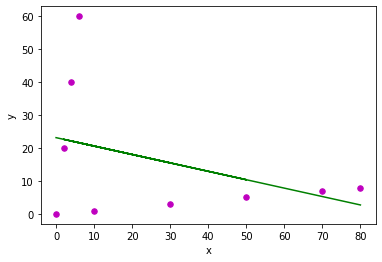

In [20]:
def estimate_coef(x,y):
  n = np.size(x);
  m_x = np.mean(x);
  m_y = np.mean(y);
  ss_xy = np.sum(y*x) - n*m_y*m_x
  ss_xx = np.sum(x*x) - n*m_x*m_x

  b_1 = ss_xy / ss_xx
  b_0 = m_y - b_1*m_x

  return(b_0, b_1)

def plot_reg(x,y,b):
  mtp.scatter(x,y,color='m', marker = 'o', s=30)
  y_pred = b[0] + b[1]*x
  mtp.plot(x, y_pred, color = 'g')
  mtp.xlabel('x')
  mtp.ylabel('y')

  mtp.show()

def main():
  x = np.array([0,10,2,30,4,50,6,70,80])
  y = np.array([0,1,20,3,40,5,60,7,8])

  b = estimate_coef(x,y);
  print("estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0],b[1]))

  plot_reg(x,y,b)

if __name__ == "__main__":
  main()
